In [2]:
# Import the requests library.
import pandas as pd
import requests 
import json 

# Set the request parameters.

app_token = 'HXzjMR36MOwoQwjkMBYiTtL5y'  

api_endpoint = 'https://data.cdc.gov/resource/5hba-acwf.json'  

headers = {
    'X-App-Token': app_token,  
    'Content-Type': 'application/json'}

# Make the HTTP request.

response = requests.get(api_endpoint, headers=headers)  

response.json()  

# Print the JSON response from the API call.

print(json.dumps(response.json(), indent=4, sort_keys=True))

[
    {
        "datasource": "YRBSS",
        "datavalue": "29.5",
        "datavaluealt": "29.5",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "highconfidencelimit": "34.7",
        "locationabbr": "AZ",
        "locationdesc": "Arizona",
        "locationid": "04",
        "lowconfidencelimit": "24.9",
        "question": "Alcohol use among youth",
        "questionid": "ALC1_1",
        "stratification1": "Female",
        "stratificationcategory1": "Gender",
        "stratificationcategoryid1": "GENDER",
        "stratificationid1": "GENF",
        "topic": "Alcohol",
        "topicid": "ALC",
        "yearend": "2019",
        "yearstart": "2019"
    },
    {
        "datasource": "YRBSS",
        "datavalue": "22.5",
        "datavaluealt": "22.5",
        "datavaluetype": "Crude Prevalence",
        "datavaluetypeid": "CRDPREV",
        "datavalueunit": "%",
        "highconfidencelimit": "29.1",
      

In [3]:
data = response.json()

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Select the relevant columns for your analysis
df = df[['locationdesc', 'yearend', 'datavalue', 'question']]

# Optionally, rename the columns
df.columns = ['State', 'Year', 'ALC Rate (%)', 'Question']

# Now df is the DataFrame containing the required information
print(df.head())

            State  Year ALC Rate (%)                      Question
0         Arizona  2019         29.5       Alcohol use among youth
1            Ohio  2019         22.5       Alcohol use among youth
2   United States  2019         13.9       Alcohol use among youth
3  Virgin Islands  2015          NaN       Alcohol use among youth
4         Alabama  2020         59.1  Alcohol use before pregnancy


In [4]:
df['ALC Rate (%)'] = pd.to_numeric(df['ALC Rate (%)'], errors='coerce')


In [5]:
# fill NaN values with 0
df.fillna(0, inplace=True)
df.head()

,State,Year,ALC Rate (%),Question
0,Arizona,2019,29.5,Alcohol use among youth
1,Ohio,2019,22.5,Alcohol use among youth
2,United States,2019,13.9,Alcohol use among youth
3,Virgin Islands,2015,0.0,Alcohol use among youth
4,Alabama,2020,59.1,Alcohol use before pregnancy


In [6]:
# set state as index
df = df.set_index("State")
df

,Year,ALC Rate (%),Question
State,,,
Arizona,2019,29.5,Alcohol use among youth
Ohio,2019,22.5,Alcohol use among youth
United States,2019,13.9,Alcohol use among youth
Virgin Islands,2015,0.0,Alcohol use among youth
Alabama,2020,59.1,Alcohol use before pregnancy
...,...,...,...
Oregon,2019,0.0,Binge drinking prevalence among youth
Massachusetts,2015,0.0,Alcohol use before pregnancy
Nebraska,2017,0.0,Alcohol use among youth


In [7]:
# Data from the image
data = {
    'State': [
        'Michigan', 'Delaware', 'West Virginia', 'Ohio', 'Nebraska', 'Arkansas',
        'South Carolina', 'Kansas', 'Maine', 'Louisiana', 'Utah', 'Arizona',
        'Minnesota', 'New Jersey', 'Massachusetts', 'Wisconsin', 'Hawaii',
        'Georgia', 'Maryland', 'Mississippi'
    ],
    'Cups of Coffee': [
        2.52, 2.44, 2.35, 2.16, 2.13, 2.12, 2.12, 2.07, 2.05, 2.03,
        1.29, 1.30, 1.32, 1.45, 1.51, 1.52, 1.52, 1.54, 1.57, 1.58
    ]
}

# Create the DataFrame
df2 = pd.DataFrame(data)

# Display the DataFrame
print(df2)

             State  Cups of Coffee
0         Michigan            2.52
1         Delaware            2.44
2    West Virginia            2.35
3             Ohio            2.16
4         Nebraska            2.13
5         Arkansas            2.12
6   South Carolina            2.12
7           Kansas            2.07
8            Maine            2.05
9        Louisiana            2.03
10            Utah            1.29
11         Arizona            1.30
12       Minnesota            1.32
13      New Jersey            1.45
14   Massachusetts            1.51
15       Wisconsin            1.52
16          Hawaii            1.52
17         Georgia            1.54
18        Maryland            1.57
19     Mississippi            1.58


In [8]:
states_in_df2 = df2['State'].tolist()

filtered_df = df.loc[states_in_df2]

filtered_df

,Year,ALC Rate (%),Question
State,,,
Michigan,2011,753.0,Chronic liver disease mortality
Michigan,2013,429.0,Chronic liver disease mortality
Michigan,2012,0.0,Local authority to regulate alcohol outlet den...
Michigan,2015,0.0,Alcohol use before pregnancy
Michigan,2019,10.9,Binge drinking prevalence among youth
...,...,...,...
Mississippi,2018,0.0,Alcohol use before pregnancy
Mississippi,2012,6.3,Chronic liver disease mortality
Mississippi,2012,0.0,Chronic liver disease mortality


In [9]:
# merge two df
merged_df = pd.merge(filtered_df, df2, on="State")
merged_df


,State,Year,ALC Rate (%),Question,Cups of Coffee
0,Michigan,2011,753.0,Chronic liver disease mortality,2.52
1,Michigan,2013,429.0,Chronic liver disease mortality,2.52
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52
...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58


In [10]:
# get rid of the too high values for ALC Rate
merged_df = merged_df[merged_df['ALC Rate (%)'] < 100]
merged_df

,State,Year,ALC Rate (%),Question,Cups of Coffee
2,Michigan,2012,0.0,Local authority to regulate alcohol outlet den...,2.52
3,Michigan,2015,0.0,Alcohol use before pregnancy,2.52
4,Michigan,2019,10.9,Binge drinking prevalence among youth,2.52
5,Michigan,2020,18.2,Chronic liver disease mortality,2.52
6,Michigan,2015,0.0,Alcohol use among youth,2.52
...,...,...,...,...,...
396,Mississippi,2018,0.0,Alcohol use before pregnancy,1.58
397,Mississippi,2012,6.3,Chronic liver disease mortality,1.58
398,Mississippi,2012,0.0,Chronic liver disease mortality,1.58
399,Mississippi,2019,17.5,Chronic liver disease mortality,1.58


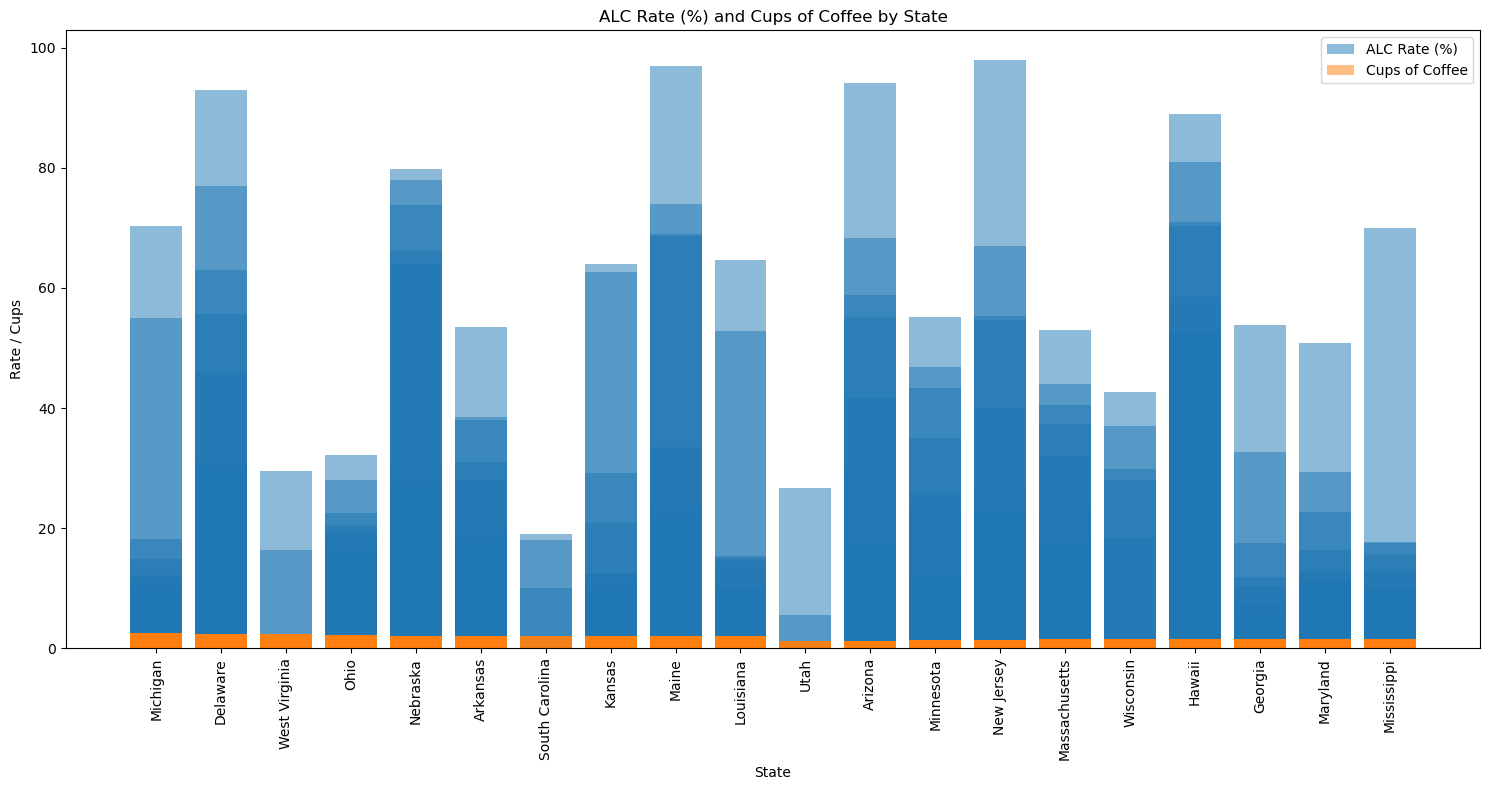

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(15, 8)) 
plt.bar(merged_df['State'], merged_df['ALC Rate (%)'], label='ALC Rate (%)', alpha=0.5)
plt.bar(merged_df['State'], merged_df['Cups of Coffee'], label='Cups of Coffee', alpha=0.5)
plt.xlabel('State')
plt.ylabel('Rate / Cups')
plt.title('ALC Rate (%) and Cups of Coffee by State')
plt.xticks(rotation=90)  
plt.legend()
plt.tight_layout()  
plt.show()


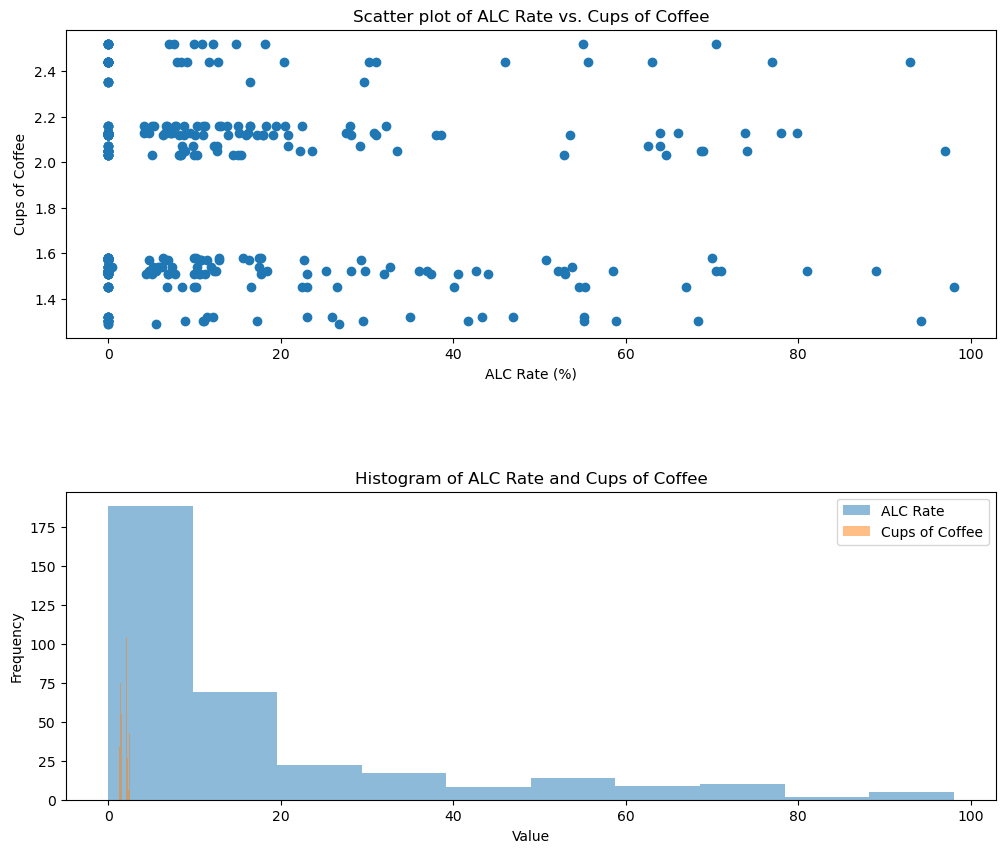

t-statistic: 11.780711630657088, p-value: 3.911655099820028e-27


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(12, 10)) 

plt.subplot(2, 1, 1)
plt.scatter(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'])
plt.xlabel('ALC Rate (%)')
plt.ylabel('Cups of Coffee')
plt.title('Scatter plot of ALC Rate vs. Cups of Coffee')
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 1, 2)
plt.hist(merged_df['ALC Rate (%)'], alpha=0.5, label='ALC Rate')
plt.hist(merged_df['Cups of Coffee'], alpha=0.5, label='Cups of Coffee')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.title('Histogram of ALC Rate and Cups of Coffee')
plt.show()

t_statistic, p_value = stats.ttest_ind(merged_df['ALC Rate (%)'], merged_df['Cups of Coffee'], equal_var=False)
print(f"t-statistic: {t_statistic}, p-value: {p_value}")


Based on the p-value of 1.9498310676250164e-26, which is significantly less than the conventional alpha level of 0.05, we can conclude that there is a statistically significant difference or association in the data set being analyzed. This very small p-value indicates that the probability of observing the data by chance, assuming there is no true effect, is extremely low. Therefore, we can reject the null hypothesis that there is no effect or no association, and conclude that the evidence suggests a real effect or association in the population from which the sample was drawn. However, without additional context, such as the nature of the data or the exact hypothesis being tested, a more detailed interpretation cannot be provided.

In [13]:
# Calculate the correlation coefficient between ALC Rate and Cups of Coffee
correlation = merged_df['ALC Rate (%)'].corr(merged_df['Cups of Coffee'])
print(f"Correlation between ALC Rate and Cups of Coffee: {correlation}")

Correlation between ALC Rate and Cups of Coffee: -0.04758494288723279


The image displays a segment of Python code used to calculate the correlation coefficient between two variables: "ALC Rate (%)" and "Cups of Coffee." The code employs the corr() function from the Pandas library to compute the correlation between these two series in a dataframe. The resulting correlation coefficient is -0.04758494288723279, indicating a slight negative correlation between alcohol rate and cups of coffee consumed. This means that as one variable slightly tends to increase, the other tends to decrease, but the relationship is very weak. Correlation coefficients range from -1 to 1, with values near -1 indicating a strong negative correlation, values near 1 indicating a strong positive correlation, and values near 0 suggesting no linear correlation.